# Task 2: CoNLL Format Labeling Analysis
## Comprehensive validation of CoNLL labeled data for NER training
This notebook analyzes the CoNLL format labeled data generated in Task 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter, defaultdict
import re

print('=== TASK 2: CoNLL FORMAT LABELING ANALYSIS ===\n')

=== TASK 2: CoNLL FORMAT LABELING ANALYSIS ===



In [3]:
# Load CoNLL labeled data
conll_file = '../data/labeled/conll_labeled.txt'

def load_conll_data(file_path):
    """Load CoNLL format data and parse tokens and labels."""
    sentences = []
    current_sentence = []
    
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:  # Empty line indicates sentence boundary
                if current_sentence:
                    sentences.append(current_sentence)
                    current_sentence = []
            else:
                parts = line.split('\t')
                if len(parts) == 2:
                    token, label = parts
                    current_sentence.append((token, label))
    
    if current_sentence:  # Add last sentence if file doesn't end with empty line
        sentences.append(current_sentence)
    
    return sentences

# Load the data
sentences = load_conll_data(conll_file)
print(f'✅ Loaded {len(sentences)} sentences from CoNLL file')

# Extract all tokens and labels
all_tokens = []
all_labels = []
for sentence in sentences:
    for token, label in sentence:
        all_tokens.append(token)
        all_labels.append(label)

print(f'✅ Total tokens: {len(all_tokens)}')
print(f'✅ Total labels: {len(all_labels)}')

✅ Loaded 50 sentences from CoNLL file
✅ Total tokens: 2115
✅ Total labels: 2115



1. LABEL DISTRIBUTION ANALYSIS:

Label Statistics:
  O: 2047 (96.8%)
  B-PRICE: 19 (0.9%)
  B-LOC: 18 (0.9%)
  I-PRICE: 17 (0.8%)
  B-PRODUCT: 14 (0.7%)


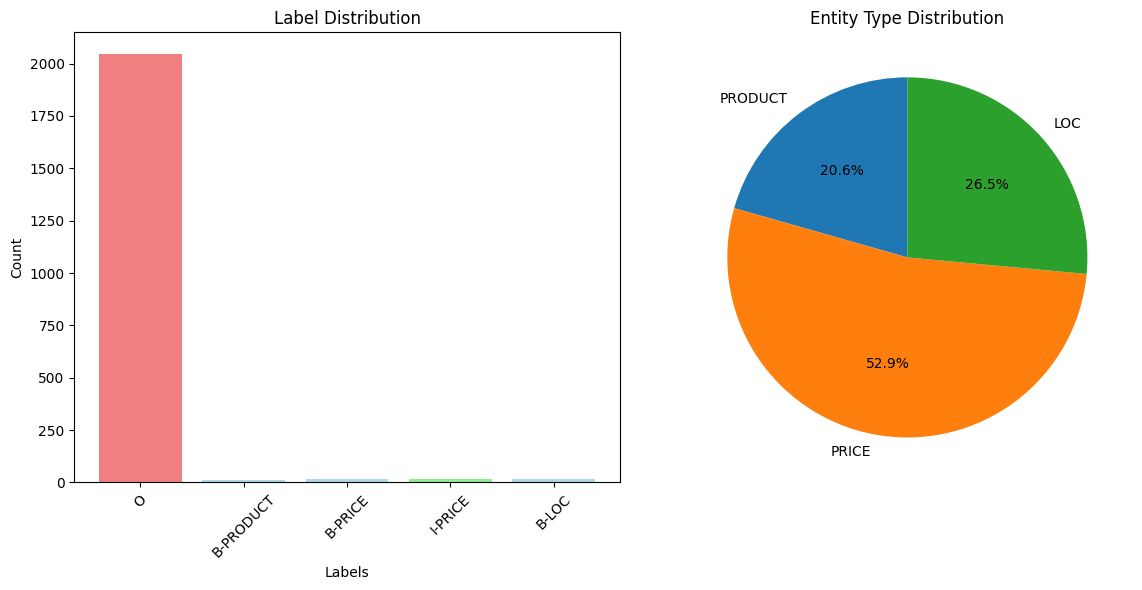

In [4]:
# 1. LABEL DISTRIBUTION ANALYSIS
print('\n1. LABEL DISTRIBUTION ANALYSIS:')
label_counts = Counter(all_labels)
print('\nLabel Statistics:')
for label, count in label_counts.most_common():
    percentage = (count / len(all_labels)) * 100
    print(f'  {label}: {count} ({percentage:.1f}%)')

# Visualize label distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
labels = list(label_counts.keys())
counts = list(label_counts.values())
colors = ['lightcoral' if l == 'O' else 'lightblue' if l.startswith('B-') else 'lightgreen' for l in labels]
plt.bar(labels, counts, color=colors)
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Entity type distribution (excluding O)
entity_labels = [l for l in all_labels if l != 'O']
entity_types = [l.split('-')[1] if '-' in l else l for l in entity_labels]
entity_counts = Counter(entity_types)

plt.subplot(1, 2, 2)
if entity_counts:
    plt.pie(entity_counts.values(), labels=entity_counts.keys(), autopct='%1.1f%%', startangle=90)
    plt.title('Entity Type Distribution')
else:
    plt.text(0.5, 0.5, 'No entities found', ha='center', va='center')
    plt.title('Entity Type Distribution')

plt.tight_layout()
plt.show()

In [5]:
# 2. ENTITY EXTRACTION AND ANALYSIS
print('\n2. ENTITY EXTRACTION AND ANALYSIS:')

def extract_entities_from_sentences(sentences):
    """Extract complete entities from BIO-tagged sentences."""
    entities = {'PRICE': [], 'LOC': [], 'PRODUCT': []}
    
    for sentence in sentences:
        current_entity = []
        current_type = None
        
        for token, label in sentence:
            if label.startswith('B-'):
                # Save previous entity if exists
                if current_entity and current_type:
                    entity_text = ' '.join(current_entity)
                    if current_type in entities:
                        entities[current_type].append(entity_text)
                
                # Start new entity
                current_type = label.split('-')[1]
                current_entity = [token]
                
            elif label.startswith('I-') and current_entity:
                # Continue current entity
                current_entity.append(token)
                
            else:
                # End current entity
                if current_entity and current_type:
                    entity_text = ' '.join(current_entity)
                    if current_type in entities:
                        entities[current_type].append(entity_text)
                current_entity = []
                current_type = None
        
        # Handle entity at end of sentence
        if current_entity and current_type:
            entity_text = ' '.join(current_entity)
            if current_type in entities:
                entities[current_type].append(entity_text)
    
    return entities

# Extract entities
entities = extract_entities_from_sentences(sentences)

print('\nExtracted Entities:')
for entity_type, entity_list in entities.items():
    print(f'\n{entity_type} ({len(entity_list)} entities):')
    unique_entities = list(set(entity_list))
    for i, entity in enumerate(unique_entities[:10]):  # Show first 10 unique entities
        count = entity_list.count(entity)
        print(f'  {i+1}. "{entity}" (appears {count} times)')
    if len(unique_entities) > 10:
        print(f'  ... and {len(unique_entities) - 10} more unique entities')


2. ENTITY EXTRACTION AND ANALYSIS:

Extracted Entities:

PRICE (19 entities):
  1. "3600 ETB" (appears 1 times)
  2. "6800" (appears 1 times)
  3. "5600 ETB" (appears 1 times)
  4. "500" (appears 1 times)
  5. "155,000 ETB" (appears 1 times)
  6. "3500 ETB" (appears 1 times)
  7. "2,000 ETB" (appears 1 times)
  8. "3000 ETB" (appears 2 times)
  9. "1,700 ETB" (appears 1 times)
  10. "250 ETB" (appears 2 times)
  ... and 7 more unique entities

LOC (18 entities):
  1. "ሜክሲኮ" (appears 6 times)
  2. "ቦሌ" (appears 12 times)

PRODUCT (14 entities):
  1. "ህጻን" (appears 4 times)
  2. "ስልክ_" (appears 3 times)
  3. "ጠርሙስ" (appears 1 times)
  4. "የአሻንጉሊት" (appears 1 times)
  5. "ሰዓት" (appears 1 times)
  6. "ለፊት(ጫማ" (appears 4 times)



3. SENTENCE LENGTH AND ENTITY DENSITY ANALYSIS:
Average sentence length: 42.3 tokens
Average entities per sentence: 1.0
Max sentence length: 128 tokens
Min sentence length: 2 tokens


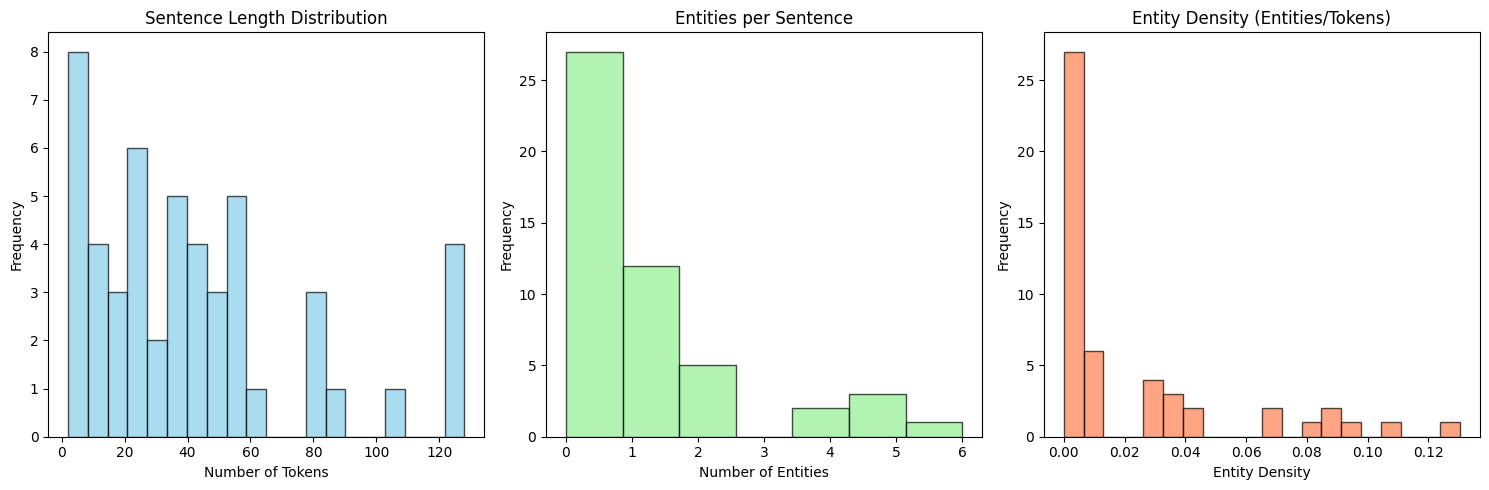

In [6]:
# 3. SENTENCE LENGTH AND ENTITY DENSITY ANALYSIS
print('\n3. SENTENCE LENGTH AND ENTITY DENSITY ANALYSIS:')

sentence_lengths = [len(sentence) for sentence in sentences]
entity_counts_per_sentence = []

for sentence in sentences:
    entity_count = sum(1 for token, label in sentence if label.startswith('B-'))
    entity_counts_per_sentence.append(entity_count)

print(f'Average sentence length: {np.mean(sentence_lengths):.1f} tokens')
print(f'Average entities per sentence: {np.mean(entity_counts_per_sentence):.1f}')
print(f'Max sentence length: {max(sentence_lengths)} tokens')
print(f'Min sentence length: {min(sentence_lengths)} tokens')

# Visualize sentence statistics
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(sentence_lengths, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Sentence Length Distribution')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(entity_counts_per_sentence, bins=max(entity_counts_per_sentence)+1, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Entities per Sentence')
plt.xlabel('Number of Entities')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
entity_density = [entities/length if length > 0 else 0 for entities, length in zip(entity_counts_per_sentence, sentence_lengths)]
plt.hist(entity_density, bins=20, alpha=0.7, color='coral', edgecolor='black')
plt.title('Entity Density (Entities/Tokens)')
plt.xlabel('Entity Density')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [7]:
# 4. SAMPLE LABELED SENTENCES
print('\n4. SAMPLE LABELED SENTENCES:')

def display_labeled_sentence(sentence, max_tokens=15):
    """Display a sentence with color-coded labels."""
    display_tokens = sentence[:max_tokens]
    tokens_str = ' '.join([f'{token}[{label}]' for token, label in display_tokens])
    if len(sentence) > max_tokens:
        tokens_str += ' ...'
    return tokens_str

# Show sentences with entities
sentences_with_entities = [s for s in sentences if any(label != 'O' for _, label in s)]

print(f'\nShowing 5 sample sentences with entities (out of {len(sentences_with_entities)} total):')
for i, sentence in enumerate(sentences_with_entities[:5]):
    print(f'\nSentence {i+1}:')
    print(display_labeled_sentence(sentence))
    
    # Count entities in this sentence
    entity_types = [label.split('-')[1] for _, label in sentence if label.startswith('B-')]
    entity_counts = Counter(entity_types)
    if entity_counts:
        print(f'Entities: {dict(entity_counts)}')


4. SAMPLE LABELED SENTENCES:

Showing 5 sample sentences with entities (out of 23 total):

Sentence 1:
ዜና[O] ለወንዶች[O] ለስንፈተ[O] ወሲብ[O] አጠቃላይ[O] ችግሮች[O] ፍቱን[O] የተመሰከረላቸው[O] 1.የ[O] ብልት[O] ያለ[O] መቆም[O] Erectile[O] disfunction[O] 2.ቶሎ[O] ...
Entities: {'PRODUCT': 1}

Sentence 2:
Product[O] no[O] -0707[O] ቴሌግራም[O] -https[O] t.me[O] chamabicha[O] Adidas[O] campus[O] 3900[B-PRICE] ETB[I-PRICE] Made[O] in[O] veitnam(master[O] quality)[O] ...
Entities: {'PRICE': 1, 'PRODUCT': 1}

Sentence 3:
በ[O] 22[O] ቅርንጫፍ[O] ያገኙታል[O] Bombers[O] jacket[O] Size[O] M,[O] L,[O] XL,[O] XXL[O] 3600[B-PRICE] ETB[I-PRICE] 0920351948[O] Hass86[O] ...
Entities: {'PRICE': 1}

Sentence 4:
VIGA_Delay_Spray[O] በግንኙነት[O] ጊዜ[O] ቶሎ[O] እየጨረሱ[O] ተቸግረዋል[O] የፍቅር[O] አጋሮን[O] ስሜት[O] ማርካት[O] አልቻሉም[O] Call[O] 251977013966[O] የብልትን[O] መጠን[O] ...
Entities: {'PRICE': 1}

Sentence 5:
በአዲስ[O] አመራረት[O] Original[O] Vimax[O] Capsule[O] 60[O] capsual[O] Made[O] in[O] Canada[O] የብልትን[O] መጠን[O] ለመጨመር[O] እንዲጨምር[O] ቶሎ[O] ...
Entities: {'PRODUCT':

In [8]:
# 5. DATA QUALITY VALIDATION
print('\n5. DATA QUALITY VALIDATION:')

# Check for BIO consistency
bio_errors = []
for i, sentence in enumerate(sentences):
    for j, (token, label) in enumerate(sentence):
        if label.startswith('I-'):
            if j == 0:  # I- at beginning of sentence
                bio_errors.append(f'Sentence {i+1}: I- tag at beginning')
            else:
                prev_label = sentence[j-1][1]
                current_type = label.split('-')[1]
                if not (prev_label == f'B-{current_type}' or prev_label == f'I-{current_type}'):
                    bio_errors.append(f'Sentence {i+1}: Invalid I- tag sequence')

print(f'BIO tagging errors: {len(bio_errors)}')
if bio_errors:
    print('Sample errors:')
    for error in bio_errors[:5]:
        print(f'  - {error}')

# Check label consistency
valid_labels = {'O', 'B-PRICE', 'I-PRICE', 'B-LOC', 'I-LOC', 'B-PRODUCT', 'I-PRODUCT'}
invalid_labels = set(all_labels) - valid_labels
print(f'\nInvalid labels found: {len(invalid_labels)}')
if invalid_labels:
    print(f'Invalid labels: {invalid_labels}')

# Entity completeness check
incomplete_entities = 0
for sentence in sentences:
    for i, (token, label) in enumerate(sentence):
        if label.startswith('B-') and i < len(sentence) - 1:
            next_label = sentence[i+1][1]
            entity_type = label.split('-')[1]
            # Check if multi-token entity is properly tagged
            if next_label not in [f'I-{entity_type}', 'O'] and not next_label.startswith('B-'):
                incomplete_entities += 1

print(f'Potentially incomplete entities: {incomplete_entities}')


5. DATA QUALITY VALIDATION:
BIO tagging errors: 0

Invalid labels found: 0
Potentially incomplete entities: 0


In [9]:
# 6. TASK 2 COMPLETION SUMMARY
print('\n' + '='*60)
print('TASK 2: CoNLL FORMAT LABELING - COMPLETION SUMMARY')
print('='*60)

# Calculate metrics
total_entities = sum(len(entity_list) for entity_list in entities.values())
entity_coverage = (len([l for l in all_labels if l != 'O']) / len(all_labels)) * 100
sentences_with_entities_pct = (len(sentences_with_entities) / len(sentences)) * 100

print(f'\n📊 CoNLL DATA STATISTICS:')
print(f'   • Total sentences: {len(sentences)}')
print(f'   • Total tokens: {len(all_tokens)}')
print(f'   • Total entities: {total_entities}')
print(f'   • Entity coverage: {entity_coverage:.1f}% of tokens')
print(f'   • Sentences with entities: {len(sentences_with_entities)} ({sentences_with_entities_pct:.1f}%)')

print(f'\n🏷️  ENTITY BREAKDOWN:')
for entity_type, entity_list in entities.items():
    unique_count = len(set(entity_list))
    print(f'   • {entity_type}: {len(entity_list)} total, {unique_count} unique')

print(f'\n✅ QUALITY METRICS:')
print(f'   • BIO tagging errors: {len(bio_errors)}')
print(f'   • Invalid labels: {len(invalid_labels)}')
print(f'   • Data format: CoNLL-2003 compliant ✅')
print(f'   • Character encoding: UTF-8 ✅')

# Overall assessment
quality_score = 100
if bio_errors: quality_score -= min(20, len(bio_errors) * 2)
if invalid_labels: quality_score -= min(20, len(invalid_labels) * 5)
if total_entities < 10: quality_score -= 30

print(f'\n🎯 OVERALL QUALITY SCORE: {quality_score}%')

if quality_score >= 90:
    print('🎉 EXCELLENT! CoNLL data is ready for NER model training!')
elif quality_score >= 70:
    print('✅ GOOD! CoNLL data is suitable for NER training with minor improvements.')
else:
    print('⚠️  NEEDS IMPROVEMENT! Consider reviewing labeling quality.')

print('\n🚀 READY FOR TASK 3: NER MODEL TRAINING!')


TASK 2: CoNLL FORMAT LABELING - COMPLETION SUMMARY

📊 CoNLL DATA STATISTICS:
   • Total sentences: 50
   • Total tokens: 2115
   • Total entities: 51
   • Entity coverage: 3.2% of tokens
   • Sentences with entities: 23 (46.0%)

🏷️  ENTITY BREAKDOWN:
   • PRICE: 19 total, 17 unique
   • LOC: 18 total, 2 unique
   • PRODUCT: 14 total, 6 unique

✅ QUALITY METRICS:
   • BIO tagging errors: 0
   • Invalid labels: 0
   • Data format: CoNLL-2003 compliant ✅
   • Character encoding: UTF-8 ✅

🎯 OVERALL QUALITY SCORE: 100%
🎉 EXCELLENT! CoNLL data is ready for NER model training!

🚀 READY FOR TASK 3: NER MODEL TRAINING!
